# Fujii Kaze's tracks analysis

In [598]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [531]:
df = pd.read_csv("track_data_cleaned_visual.csv", index_col=0)

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 49
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          48 non-null     object 
 1   track_name        48 non-null     object 
 2   href              48 non-null     object 
 3   popularity        48 non-null     float64
 4   uri               48 non-null     object 
 5   release_date      48 non-null     object 
 6   album_id          48 non-null     object 
 7   album_name        48 non-null     object 
 8   duration          48 non-null     float64
 9   loudness          48 non-null     float64
 10  tempo             48 non-null     float64
 11  time_signature    48 non-null     object 
 12  key               48 non-null     object 
 13  mode              48 non-null     object 
 14  acousticness      48 non-null     float64
 15  energy            48 non-null     float64
 16  instrumentalness  48 non-null     float64
 17  danc

In [ ]:
# convert release date to datetime datatype
df["release_date"] = pd.to_datetime(df["release_date"],
               format='%Y-%m-%d')

In [519]:
df.head()

,track_id,track_name,href,popularity,uri,release_date,album_id,album_name,duration,loudness,tempo,time_signature,key,mode,acousticness,energy,instrumentalness,danceability,liveness,speechiness
0,4hsEFcCA7AL5hlKG4PRp2Z,Michi Teyu Ku (Overflowing),https://api.spotify.com/v1/tracks/4hsEFcCA7AL5...,69.0,spotify:track:4hsEFcCA7AL5hlKG4PRp2Z,2024-03-14,06qRSgIo9l4Gf7ACV6JZQq,Michi Teyu Ku (Overflowing),310.99710,-7.910,143.990,4/4,A,Major,0.47300,0.591,0.052300,0.565,0.107,0.0336
1,0o9zmvc5f3EFApU52PPIyW,Shinunoga E-Wa,https://api.spotify.com/v1/tracks/0o9zmvc5f3EF...,78.0,spotify:track:0o9zmvc5f3EFApU52PPIyW,2020-05-20,1OojCidx0eoPKch2M0Kz31,HELP EVER HURT NEVER,185.57333,-6.124,158.078,4/4,F#/Gb,Minor,0.16600,0.760,0.000041,0.600,0.189,0.0452
2,7AMGgAPFczs3wJgMqu6Eqi,Matsuri,https://api.spotify.com/v1/tracks/7AMGgAPFczs3...,68.0,spotify:track:7AMGgAPFczs3wJgMqu6Eqi,2022-03-23,7Ip9X7pnkhJ4cwDoBnvneD,LOVE ALL SERVE ALL,225.92000,-7.335,97.025,4/4,C#/Db,Major,0.00892,0.731,0.050200,0.663,0.293,0.0338
3,51oc6MEsXTpnPn6GOw5VuP,きらり,https://api.spotify.com/v1/tracks/51oc6MEsXTpn...,63.0,spotify:track:51oc6MEsXTpnPn6GOw5VuP,2022-01-14,2OXwORzPU4tm1Skiv6l9KT,Kirari Remixes (Asia Edition),231.88295,-6.833,116.982,4/4,D,Major,0.00803,0.764,0.000000,0.746,0.357,0.0462
4,02tNuntKQsoou5T4O8meyh,Hana,https://api.spotify.com/v1/tracks/02tNuntKQsoo...,62.0,spotify:track:02tNuntKQsoou5T4O8meyh,2023-10-12,0v6vQ9tMopUTccn0wUvzQD,Hana,246.69986,-8.203,123.031,4/4,F,Minor,0.11800,0.716,0.006590,0.769,0.158,0.0429


In [520]:
# datafram of numeric values
df_num = df.select_dtypes(include=['number'])

In [521]:
# inspect statistical data of each attributes
df_num.describe()

,popularity,duration,loudness,tempo,acousticness,energy,instrumentalness,danceability,liveness,speechiness
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,48.791667,238.872151,-8.240396,123.032125,0.392259,0.585552,0.061781,0.634552,0.211153,0.052533
std,9.364847,45.468396,1.961198,26.728142,0.385240,0.189962,0.166467,0.115963,0.116045,0.036682
min,30.000000,145.040000,-13.280000,81.973000,0.001440,0.209000,0.000000,0.251000,0.074700,0.027200
25%,41.750000,204.231302,-9.629250,101.179250,0.044300,0.406250,0.000015,0.586000,0.106500,0.033875
50%,48.000000,235.476965,-7.939500,116.978500,0.158500,0.588000,0.000186,0.655500,0.152500,0.043500
75%,52.000000,277.356673,-6.688750,138.011000,0.855500,0.742375,0.029475,0.708125,0.340500,0.051125
max,78.000000,324.146670,-5.579000,180.065000,0.945000,0.884000,0.769000,0.831000,0.419000,0.221000


## Top 5 most and least popular song

In [458]:
# top 5 most popular
track_popm = df.sort_values(by = "popularity", ascending=False)
track_popm[["track_name","popularity"]].head()

,track_name,popularity
1,Shinunoga E-Wa,78.0
0,Michi Teyu Ku (Overflowing),69.0
2,Matsuri,68.0
3,きらり,63.0
11,grace,62.0


In [459]:
# top 5 least popular
track_popl = df.sort_values(by = "popularity", ascending=True)
track_popl[["track_name","popularity"]].head()

,track_name,popularity
49,Shake It Off,30.0
38,Be Alright,35.0
34,Shape Of You,36.0
41,Hot Stuff,39.0
46,Circles,39.0


## Inspect key, mode, and time signature used in Fujii Kaze's tracks

In [461]:
# key
df["key"].value_counts()

key
A        10
C#/Db     8
B         6
D         5
G         5
C         4
D#/Eb     3
F         2
E         2
G#/Ab     2
F#/Gb     1
Name: count, dtype: int64

In [464]:
# mode
df["mode"].value_counts()

mode
Major    32
Minor    16
Name: count, dtype: int64

In [596]:
# 7 out of tracks with key A (major mode also) have popularity higher than average
track_A = df[df["key"]=='A']
track_A[["track_name","mode","popularity"]][track_A["popularity"] > df["popularity"].mean()]

,track_name,mode,popularity
0,Michi Teyu Ku (Overflowing),Major,69.0
10,Tabiji,Major,52.0
12,Kaerou,Major,53.0
13,SAYONARA Baby,Major,52.0
17,Mo-Eh-Wa,Major,50.0
18,へでもねーよ,Minor,50.0
48,旅路,Major,50.0


In [485]:
# 2 out of 10 tracks with key A and major mode have popularity higher than the third quartile
track_A[["track_name","mode","popularity"]][track_A["popularity"] > df["popularity"].quantile(0.75)]

,track_name,mode,popularity
0,Michi Teyu Ku (Overflowing),Major,69.0
12,Kaerou,Major,53.0


In [486]:
# time signature
df["time_signature"].value_counts()

time_signature
4/4    47
3/4     1
Name: count, dtype: int64

In [498]:
# only 1 song with 3/4 time_signature is Kazeyo from HELP EVER HURT NEVER album
df[["track_name","album_name"]][df["time_signature"]=="3/4"]

,track_name,album_name
14,Kazeyo,HELP EVER HURT NEVER


## Inspect tracks' features of each album

In [488]:
# copy numeric dataframe
df_al = df_num.copy()

In [489]:
# add column album_name
df_al["album_name"] = df["album_name"]

In [490]:
# average value of each numeric attribute group by album
album_avg = df_al.groupby('album_name').mean().round(2)
album_avg

,popularity,duration,loudness,tempo,acousticness,energy,instrumentalness,danceability,liveness,speechiness
album_name,,,,,,,,,,
HELP EVER HURT COVER,35.75,203.31,-10.76,112.73,0.88,0.38,0.01,0.62,0.20,0.04
HELP EVER HURT NEVER,51.91,254.28,-6.71,126.34,0.20,0.68,0.00,0.61,0.23,0.06
Hana,52.00,247.13,-9.40,123.01,0.50,0.52,0.00,0.73,0.13,0.04
Kirari Remixes (Asia Edition),56.50,238.61,-6.77,115.99,0.03,0.72,0.00,0.79,0.35,0.11
LOVE ALL COVER ALL,41.27,204.57,-10.08,106.62,0.88,0.39,0.25,0.67,0.18,0.04
LOVE ALL SERVE ALL,51.36,252.64,-7.78,138.01,0.14,0.68,0.01,0.60,0.20,0.06
Michi Teyu Ku (Overflowing),69.00,311.00,-7.91,143.99,0.47,0.59,0.05,0.56,0.11,0.03
Workin' Hard,62.00,239.07,-6.11,90.00,0.03,0.66,0.00,0.74,0.10,0.09
grace,62.00,289.54,-8.76,108.97,0.08,0.68,0.03,0.67,0.32,0.05


In [491]:
# most popular album/single
album_avg[album_avg["popularity"]==album_avg["popularity"].max()]

,popularity,duration,loudness,tempo,acousticness,energy,instrumentalness,danceability,liveness,speechiness
album_name,,,,,,,,,,
Michi Teyu Ku (Overflowing),69.0,311.0,-7.91,143.99,0.47,0.59,0.05,0.56,0.11,0.03


In [492]:
# least popular album/single
album_avg[album_avg["popularity"]==album_avg["popularity"].min()]

,popularity,duration,loudness,tempo,acousticness,energy,instrumentalness,danceability,liveness,speechiness
album_name,,,,,,,,,,
HELP EVER HURT COVER,35.75,203.31,-10.76,112.73,0.88,0.38,0.01,0.62,0.2,0.04


In [493]:
# counts of track's key in each album
df.groupby('album_name')['key'].value_counts()

album_name                     key  
HELP EVER HURT COVER           C        1
                               C#/Db    1
                               D#/Eb    1
                               E        1
HELP EVER HURT NEVER           A        5
                               B        2
                               G        2
                               C#/Db    1
                               F#/Gb    1
Hana                           D#/Eb    1
                               F        1
Kirari Remixes (Asia Edition)  D        1
                               G        1
LOVE ALL COVER ALL             B        3
                               C#/Db    2
                               D        2
                               A        1
                               C        1
                               D#/Eb    1
                               G#/Ab    1
LOVE ALL SERVE ALL             C        2
                               C#/Db    2
                               A       

In [494]:
# counts of track's mode in each album
df.groupby('album_name')['mode'].value_counts()

album_name                     mode 
HELP EVER HURT COVER           Minor     3
                               Major     1
HELP EVER HURT NEVER           Major     6
                               Minor     5
Hana                           Major     1
                               Minor     1
Kirari Remixes (Asia Edition)  Major     2
LOVE ALL COVER ALL             Major     7
                               Minor     4
LOVE ALL SERVE ALL             Major    10
                               Minor     1
Michi Teyu Ku (Overflowing)    Major     1
Workin' Hard                   Minor     1
grace                          Major     1
へでもねーよ                         Minor     1
まつり                            Major     1
旅路                             Major     1
青春病                            Major     1
Name: count, dtype: int64

## Track's popularity by released year

In [582]:
df_y = df.copy()

In [583]:
df_y["year"] = df["release_date"].dt.year

In [593]:
# counts of released tracks by year
df_y.groupby("year")["track_id"].count()

year
2020    17
2021     1
2022    26
2023     3
2024     1
Name: track_id, dtype: int64

In [584]:
# average track's popularity by released year
df_y.groupby("year")["popularity"].mean().round(2)

year
2020    47.76
2021    50.00
2022    47.88
2023    55.33
2024    69.00
Name: popularity, dtype: float64

In [586]:
# top song of each year
most_popular_tracks = df_y.loc[df_y.groupby("year")["popularity"].idxmax()]
most_popular_tracks[["year", "track_name","popularity"]]

,year,track_name,popularity
1,2020,Shinunoga E-Wa,78.0
48,2021,旅路,50.0
2,2022,Matsuri,68.0
4,2023,Hana,62.0
0,2024,Michi Teyu Ku (Overflowing),69.0


## Correlation

In [442]:
df = pd.read_csv("track_data_cleaned.csv", index_col=0)

In [443]:
df_num = df.select_dtypes(include=['number'])

<Axes: >

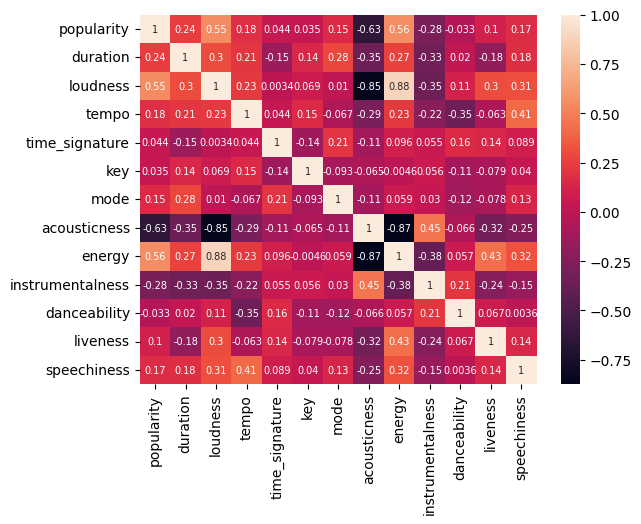

In [448]:
# visualize correlation using heatmap
df_num.corr()
sns.heatmap(df_num.corr(), annot=True, annot_kws={"size": 7})

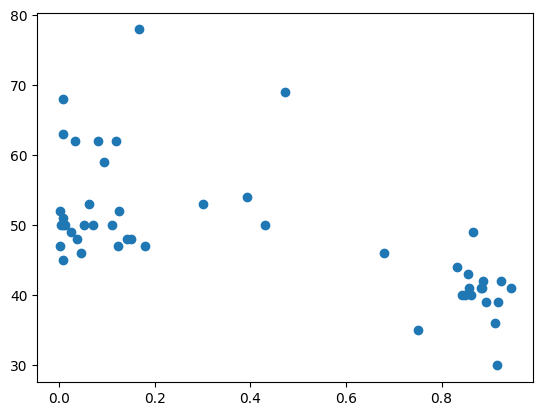

In [597]:
# there are moderate negative correlation between (acousticness, popularity), (loudness, popularity), and (energy, popularity)
# since there are also strong negative correlation between (loudness, acousticness) and (energy, acousticness)
# there is no strong correlation, so further analysis using advanced technique is needed to ... popularity
# # we focus on only acousticness for simplification
plt.scatter(df_num["acousticness"], df_num["popularity"])

In [212]:
# the acousticness of the most popular track is low
df[["track_name","acousticness"]][df["popularity"]==df["popularity"].max()]

,track_name,acousticness
1,Shinunoga E-Wa,0.166


In [213]:
# the acousticness of the most popular track is high
df[["track_name","acousticness"]][df["popularity"]==df["popularity"].min()]

,track_name,acousticness
48,Shake It Off,0.917
